<a href="https://colab.research.google.com/github/Anushreearora/SC1015_Mini_project_Fraudulent_job_classification/blob/main/DSAI_GRP4_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraudulent Job Classifer

---



In [ ]:
# Import Libraries
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import re
import string
import random
import pandas_profiling as pd_profiling
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
%matplotlib inline
sb.set() # set the default Seaborn style for graphics

#for random forest
! pip install plotly

from matplotlib.pyplot import figure
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot #error
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

!pip install wordcloud 
!pip install -U spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


In [ ]:
Originaldata=pd.read_csv("fake_job_postings.csv")
Originaldata.head()

In [ ]:
Originaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

## Exploratory Data Analysis

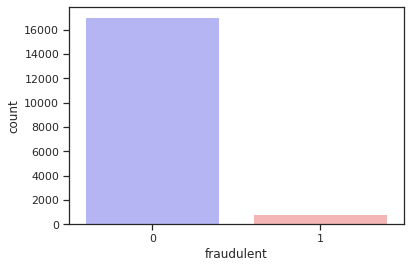

In [ ]:
sb.set(style="ticks")
f = sb.countplot(x="fraudulent", data=Originaldata, palette="bwr") #maybe change palette idk 
plt.show()

Noticeably much less fraudulent job openings than non-fraudulent ones

In [ ]:
print(Originaldata.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [ ]:
print("Number of job id Types :", len(Originaldata["job_id"].unique()))
print("Number of title Types :", len(Originaldata["title"].unique()))
print("Number of location Types :", len(Originaldata["location"].unique()))
print("Number of department Types :", len(Originaldata["department"].unique()))
print("Number of salary range Types :", len(Originaldata["salary_range"].unique()))
print("Number of company profile Types :", len(Originaldata["company_profile"].unique()))
print("Number of description Types :", len(Originaldata["description"].unique()))
print("Number of requirements Types :", len(Originaldata["requirements"].unique()))
print("Number of benefits Types :", len(Originaldata["benefits"].unique()))
print("Number of telecommuting Types :", len(Originaldata["telecommuting"].unique()))
print("Number of has_company_logo Types :", len(Originaldata["has_company_logo"].unique()))
print("Number of has_questions Types :", len(Originaldata["has_questions"].unique()))
print("Number of employment_type Types :", len(Originaldata["employment_type"].unique()))
print("Number of required_experience Types :", len(Originaldata["required_experience"].unique()))
print("Number of required_education Types :", len(Originaldata["required_education"].unique()))
print("Number of industry Types :", len(Originaldata["industry"].unique()))
print("Number of function Types :", len(Originaldata["function"].unique()))
print("Number of fraudulent Types :", len(Originaldata["fraudulent"].unique()))

Number of job id Types : 17880
Number of title Types : 11231
Number of location Types : 3106
Number of department Types : 1338
Number of salary range Types : 875
Number of company profile Types : 1710
Number of description Types : 14802
Number of requirements Types : 11969
Number of benefits Types : 6206
Number of telecommuting Types : 2
Number of has_company_logo Types : 2
Number of has_questions Types : 2
Number of employment_type Types : 6
Number of required_experience Types : 8
Number of required_education Types : 14
Number of industry Types : 132
Number of function Types : 38
Number of fraudulent Types : 2


In [ ]:
print("Telecommuting Categories: ")
print(Originaldata["telecommuting"].value_counts())
print("")
print("")
print("has_company_logo Categories:")
print(Originaldata["has_company_logo"].value_counts())
print("")
print("")
print("has_questions Categories: ")
print(Originaldata["has_questions"].value_counts())
print("")
print("")
print("employment_type Categories: ")
print(Originaldata["employment_type"].value_counts())
print("")
print("")
print("required_experience Categories: ")
print(Originaldata["required_experience"].value_counts())
print("")
print("")
print("required_education Categories: ")
print(Originaldata["required_education"].value_counts())
print("")
print("")
print("industry Categories: ")
print(Originaldata["industry"].value_counts())
print("")
print("")
print("function Categories: ")
print(Originaldata["function"].value_counts())
print("")
print("")
print("fraudulent Categories: ")
print(Originaldata["fraudulent"].value_counts())
print("")

Telecommuting Categories: 
0    17113
1      767
Name: telecommuting, dtype: int64


has_company_logo Categories:
1    14220
0     3660
Name: has_company_logo, dtype: int64


has_questions Categories: 
0    9088
1    8792
Name: has_questions, dtype: int64


employment_type Categories: 
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64


required_experience Categories: 
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64


required_education Categories: 
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Prof

From primary analysis, we know that the data have the following types;

telecommuting: Boolean 

has_company_logo: Boolean 

has_questions: Boolean fraudulent: Boolean

location: Categorical 

department: Categorical 

employment_type: Categorical 

required_experience: Categorical 

required_education: Categorical 

industry: Categorical 

function: Categorical

In [ ]:
Originaldata.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We drew a few conclusions from the profile report:

1.  job_id can be removed because it serves as merely a label
2.  There are a few variables ('department' and 'salary-range') with a noticeable amount of missing values, hence we decided to drop them.
3. We identified 'title', 'company_profile', 'description' and 'requirements' and 'benefits' as text data because they vary widely across different job openings.
4. Since department and salary_range have a lot of missing data (64.6% and 84.0% respectively), they are not reliable measures to train the model with. Hence we decided to drop them.











In [ ]:
Boolean_Categorical_Fraud= Originaldata.drop(['job_id','title', 'company_profile', 'description', 'requirements', 'benefits','department', 'salary_range'], axis = 1)
Boolean_Categorical_Fraud['telecommuting'] = Boolean_Categorical_Fraud['telecommuting'].astype(bool)
Boolean_Categorical_Fraud['has_company_logo'] = Boolean_Categorical_Fraud['has_company_logo'].astype(bool)
Boolean_Categorical_Fraud['has_questions'] = Boolean_Categorical_Fraud['has_questions'].astype(bool)
Boolean_Categorical_Fraud['fraudulent'] = Boolean_Categorical_Fraud['fraudulent'].astype(bool)
Boolean_Categorical_Fraud['location']= Boolean_Categorical_Fraud.location.astype('category')
Boolean_Categorical_Fraud['employment_type']= Boolean_Categorical_Fraud.employment_type.astype('category')
Boolean_Categorical_Fraud['required_experience']= Boolean_Categorical_Fraud.required_experience.astype('category')
Boolean_Categorical_Fraud['required_education']= Boolean_Categorical_Fraud.required_education.astype('category')
Boolean_Categorical_Fraud['industry']= Boolean_Categorical_Fraud.industry.astype('category')
Boolean_Categorical_Fraud['function']= Boolean_Categorical_Fraud.function.astype('category')

In [ ]:
print(Boolean_Categorical_Fraud.dtypes)

location               category
telecommuting              bool
has_company_logo           bool
has_questions              bool
employment_type        category
required_experience    category
required_education     category
industry               category
function               category
fraudulent                 bool
dtype: object


                  telecommuting  has_company_logo  has_questions  fraudulent
telecommuting          1.000000         -0.019836       0.020345    0.034523
has_company_logo      -0.019836          1.000000       0.233932   -0.261971
has_questions          0.020345          0.233932       1.000000   -0.091627
fraudulent             0.034523         -0.261971      -0.091627    1.000000


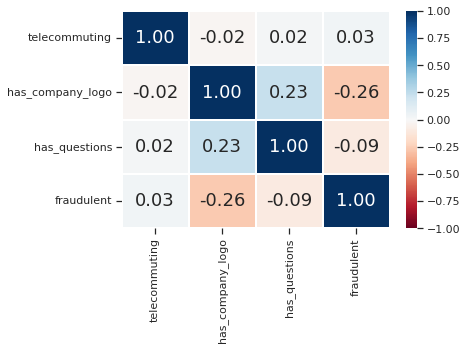

In [ ]:
corr = Boolean_Categorical_Fraud.corr()
print(corr)
sb.heatmap(corr, vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
plt.show() 

In [ ]:
print(Originaldata.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


Country Categories: 
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: country, Length: 90, dtype: int64




Text(0.5, 0, 'Country')

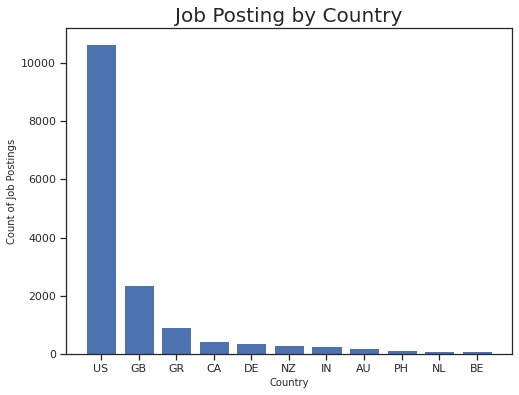

In [ ]:
def split(location):
    l = location.split(',')
    return l[0]

Boolean_Categorical_Fraud['country'] = Boolean_Categorical_Fraud.location.apply(split)
Originaldata['country']=Boolean_Categorical_Fraud['country']

print("Country Categories: ")
print(Boolean_Categorical_Fraud["country"].value_counts())
print("")
print("")

country = dict(Boolean_Categorical_Fraud.country.value_counts()[:11])
plt.figure(figsize=(8,6))
plt.title('Job Posting by Country', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('Count of Job Postings', size=10)
plt.xlabel('Country', size=10)

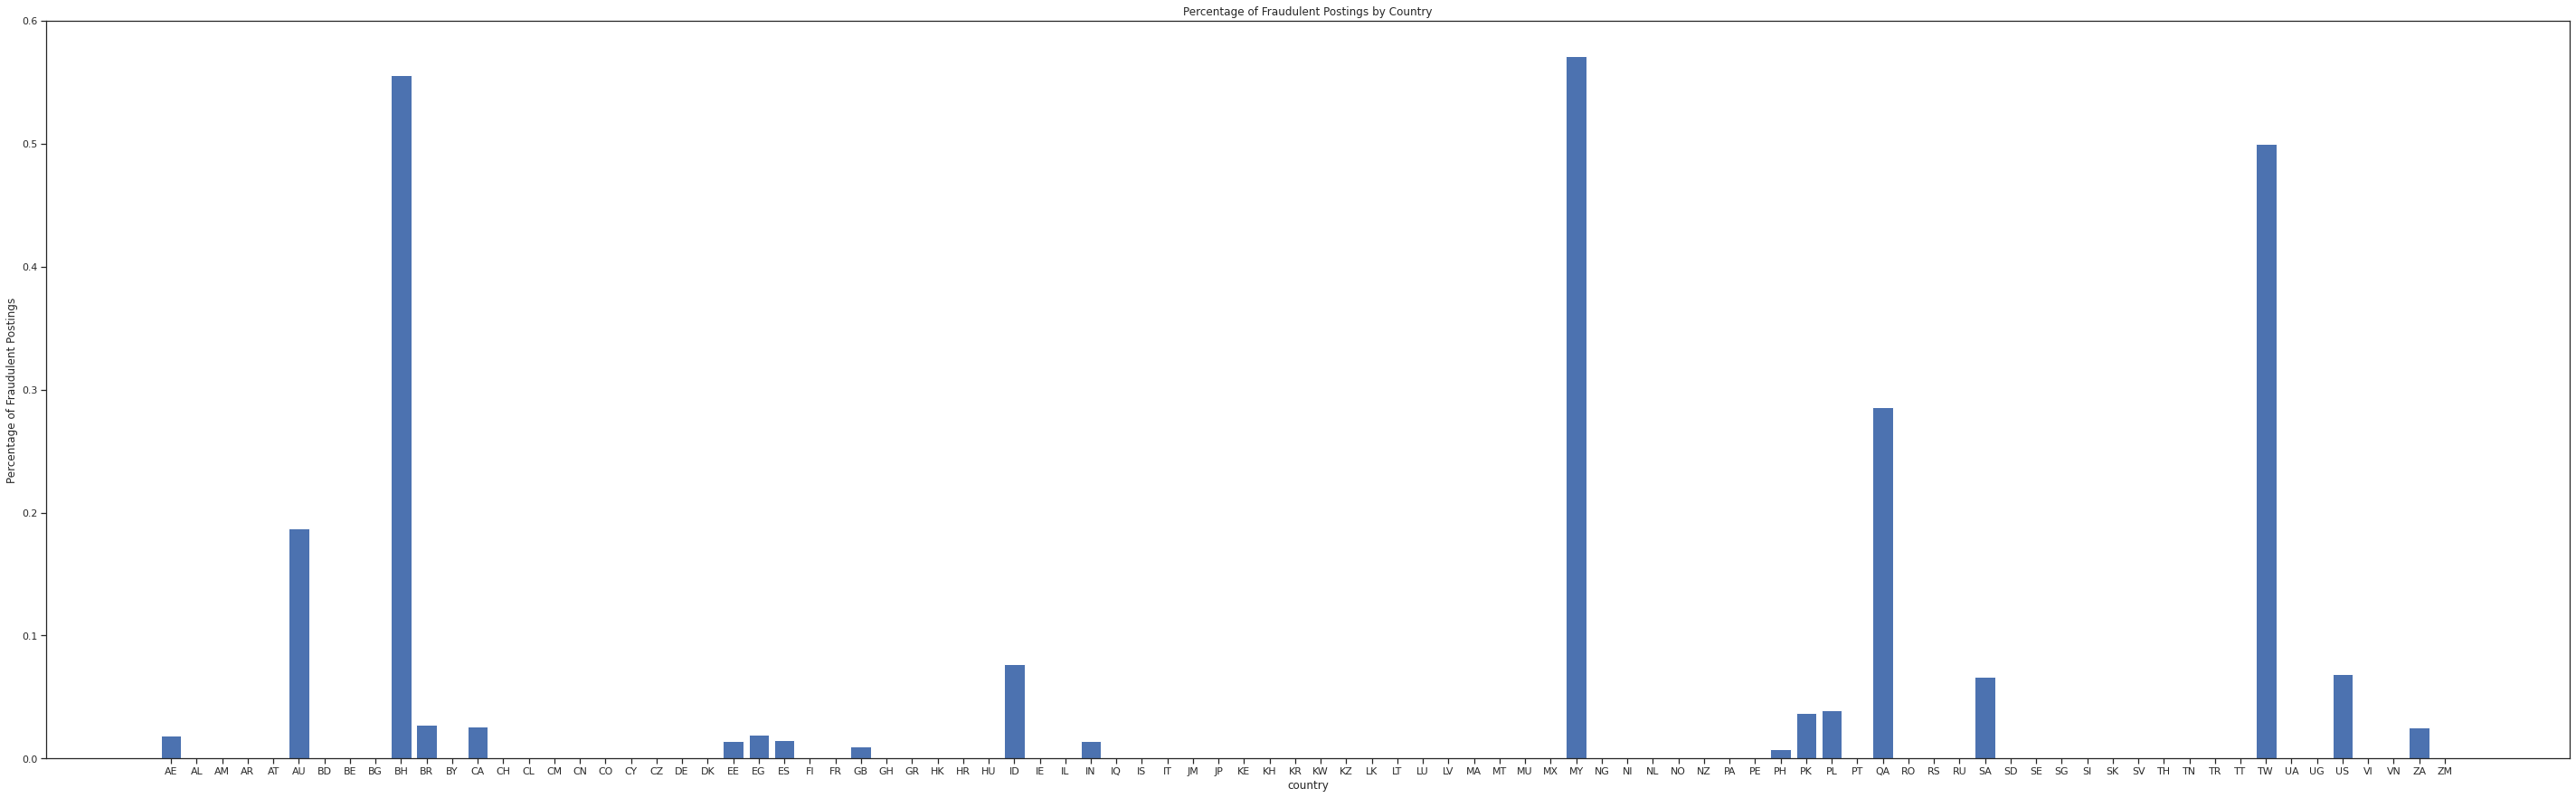

In [ ]:
Fraud_Country=Boolean_Categorical_Fraud.groupby('country').mean()['fraudulent']
plt.figure(figsize=(50,15))
plt.title('Percentage of Fraudulent Postings by Country')
plt.xlabel('country')
plt.ylabel('Percentage of Fraudulent Postings')
plt.bar(np.array(Fraud_Country.index,dtype='str'),Fraud_Country)

plt.show()

Here, we see that the top 3 places with fraudulent job postings are for Bahrain, Malaysia and Taiwan.

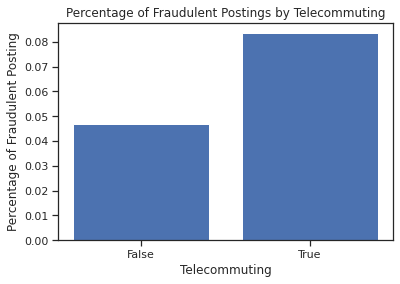

In [ ]:
Fraud_Telecommuting=Boolean_Categorical_Fraud.groupby('telecommuting').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by Telecommuting')
plt.xlabel('Telecommuting')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_Telecommuting.index,dtype='str'),Fraud_Telecommuting)
plt.show()

The graph above shows that of all fraudulent job postings, jobs that allow for telecommuting are almost twice as likely to be fraudulent

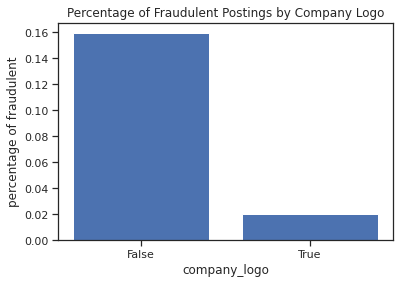

In [ ]:
Fraud_CompanyLogo= Boolean_Categorical_Fraud.groupby('has_company_logo').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by Company Logo')
plt.xlabel('company_logo')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(Fraud_CompanyLogo.index,dtype='str'),Fraud_CompanyLogo)
plt.show()

The graph above shows that of all fraudulent job postings, postings that do no have a company logo are significantly (almost 8 times) more likely to be fraudulent

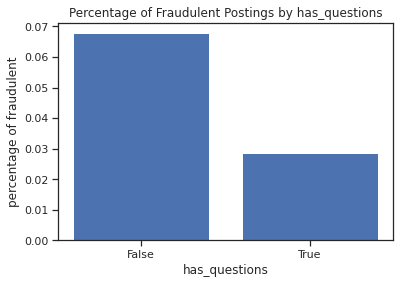

In [ ]:
Fraud_hasquestions= Boolean_Categorical_Fraud.groupby('has_questions').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by has_questions')
plt.xlabel('has_questions')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(Fraud_hasquestions.index,dtype='str'),Fraud_hasquestions)
plt.show()

Job postings without questions were almost twice as likely of being fraudulent

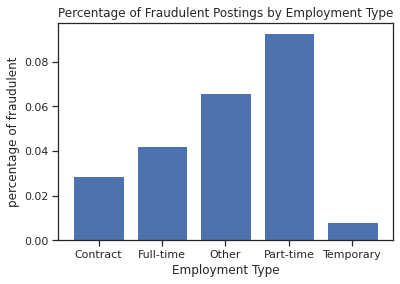

In [ ]:
Fraud_EmploymentType=Boolean_Categorical_Fraud.groupby('employment_type').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(Fraud_EmploymentType.index,dtype='str'),Fraud_EmploymentType)
plt.show()

Part-time jobs have the highest occurance of being a fraud, whereas temporary jobs have the least occurance of being fraudulent

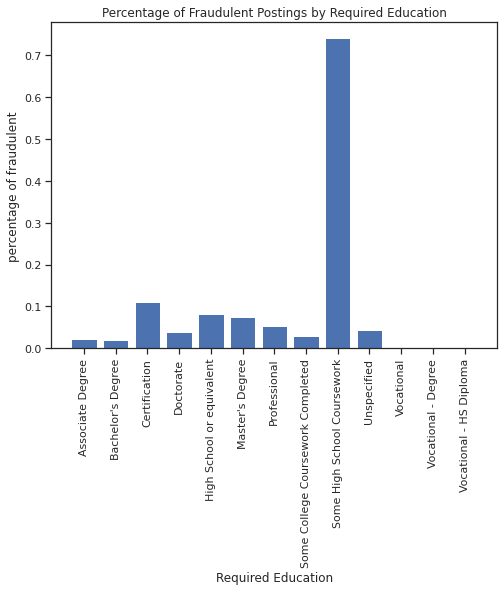

In [ ]:
Fraud_RequiredEducation=Boolean_Categorical_Fraud.groupby('required_education').mean()['fraudulent']
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.title('Percentage of Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(Fraud_RequiredEducation.index,dtype='str'),Fraud_RequiredEducation)
plt.show()

We can see that almost 70% of fraudulent job posting required some high school coursework. About 10% of fraudulent of job postings required certification.

<BarContainer object of 131 artists>

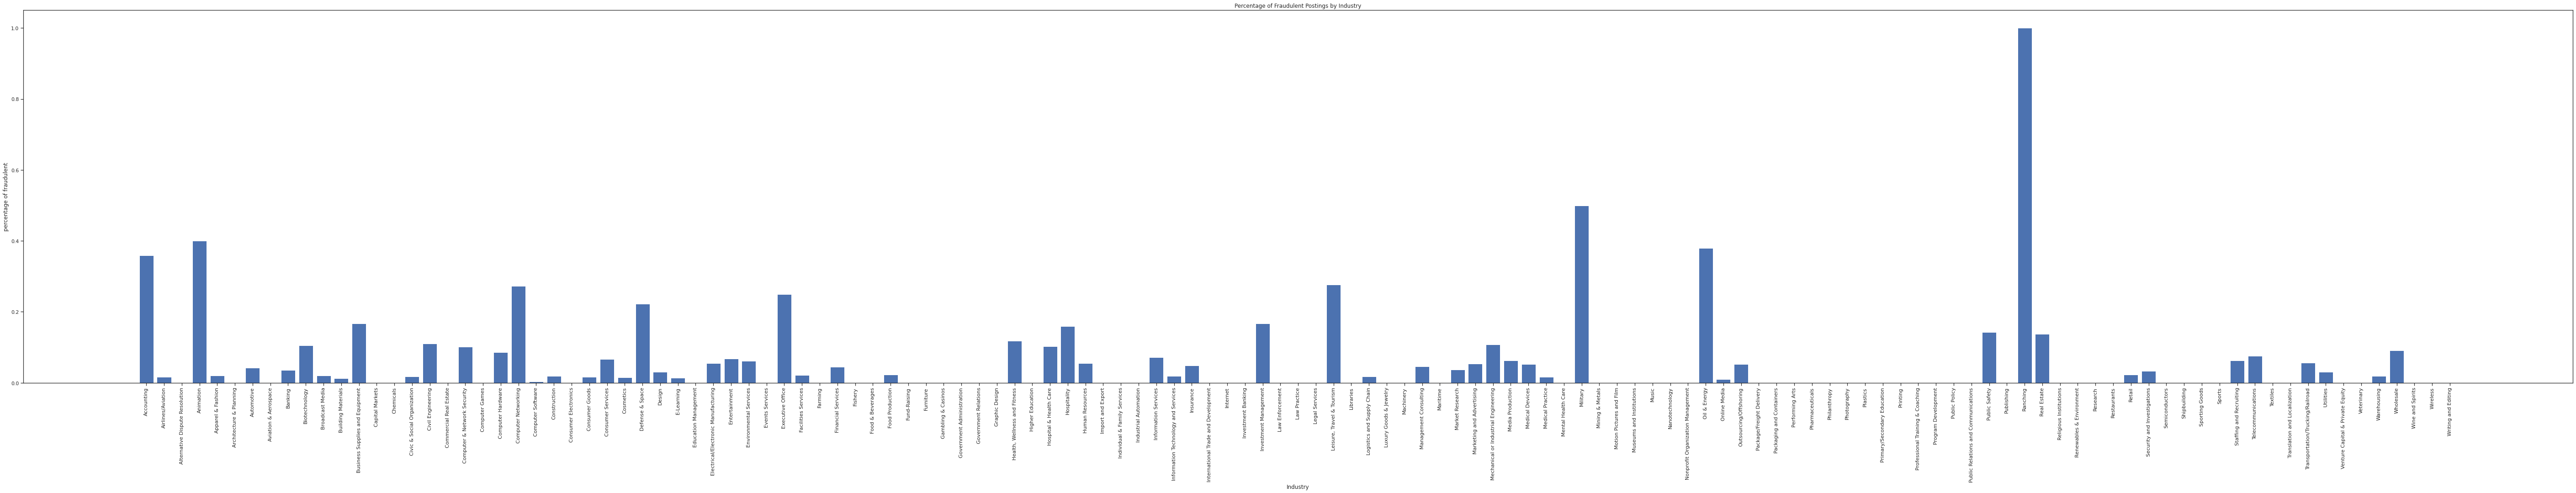

In [ ]:
Fraud_Industry=Boolean_Categorical_Fraud.groupby('industry').mean()['fraudulent']
plt.figure(figsize=(100,15))
plt.title('Percentage of Fraudulent Postings by Industry')
plt.xlabel('Industry')
plt.ylabel('percentage of fraudulent')
plt.xticks(rotation=90)
plt.bar(np.array(Fraud_Industry.index,dtype='str'),Fraud_Industry)

The ranching industry has the highest number of fraudulent job postings, followed second by the military

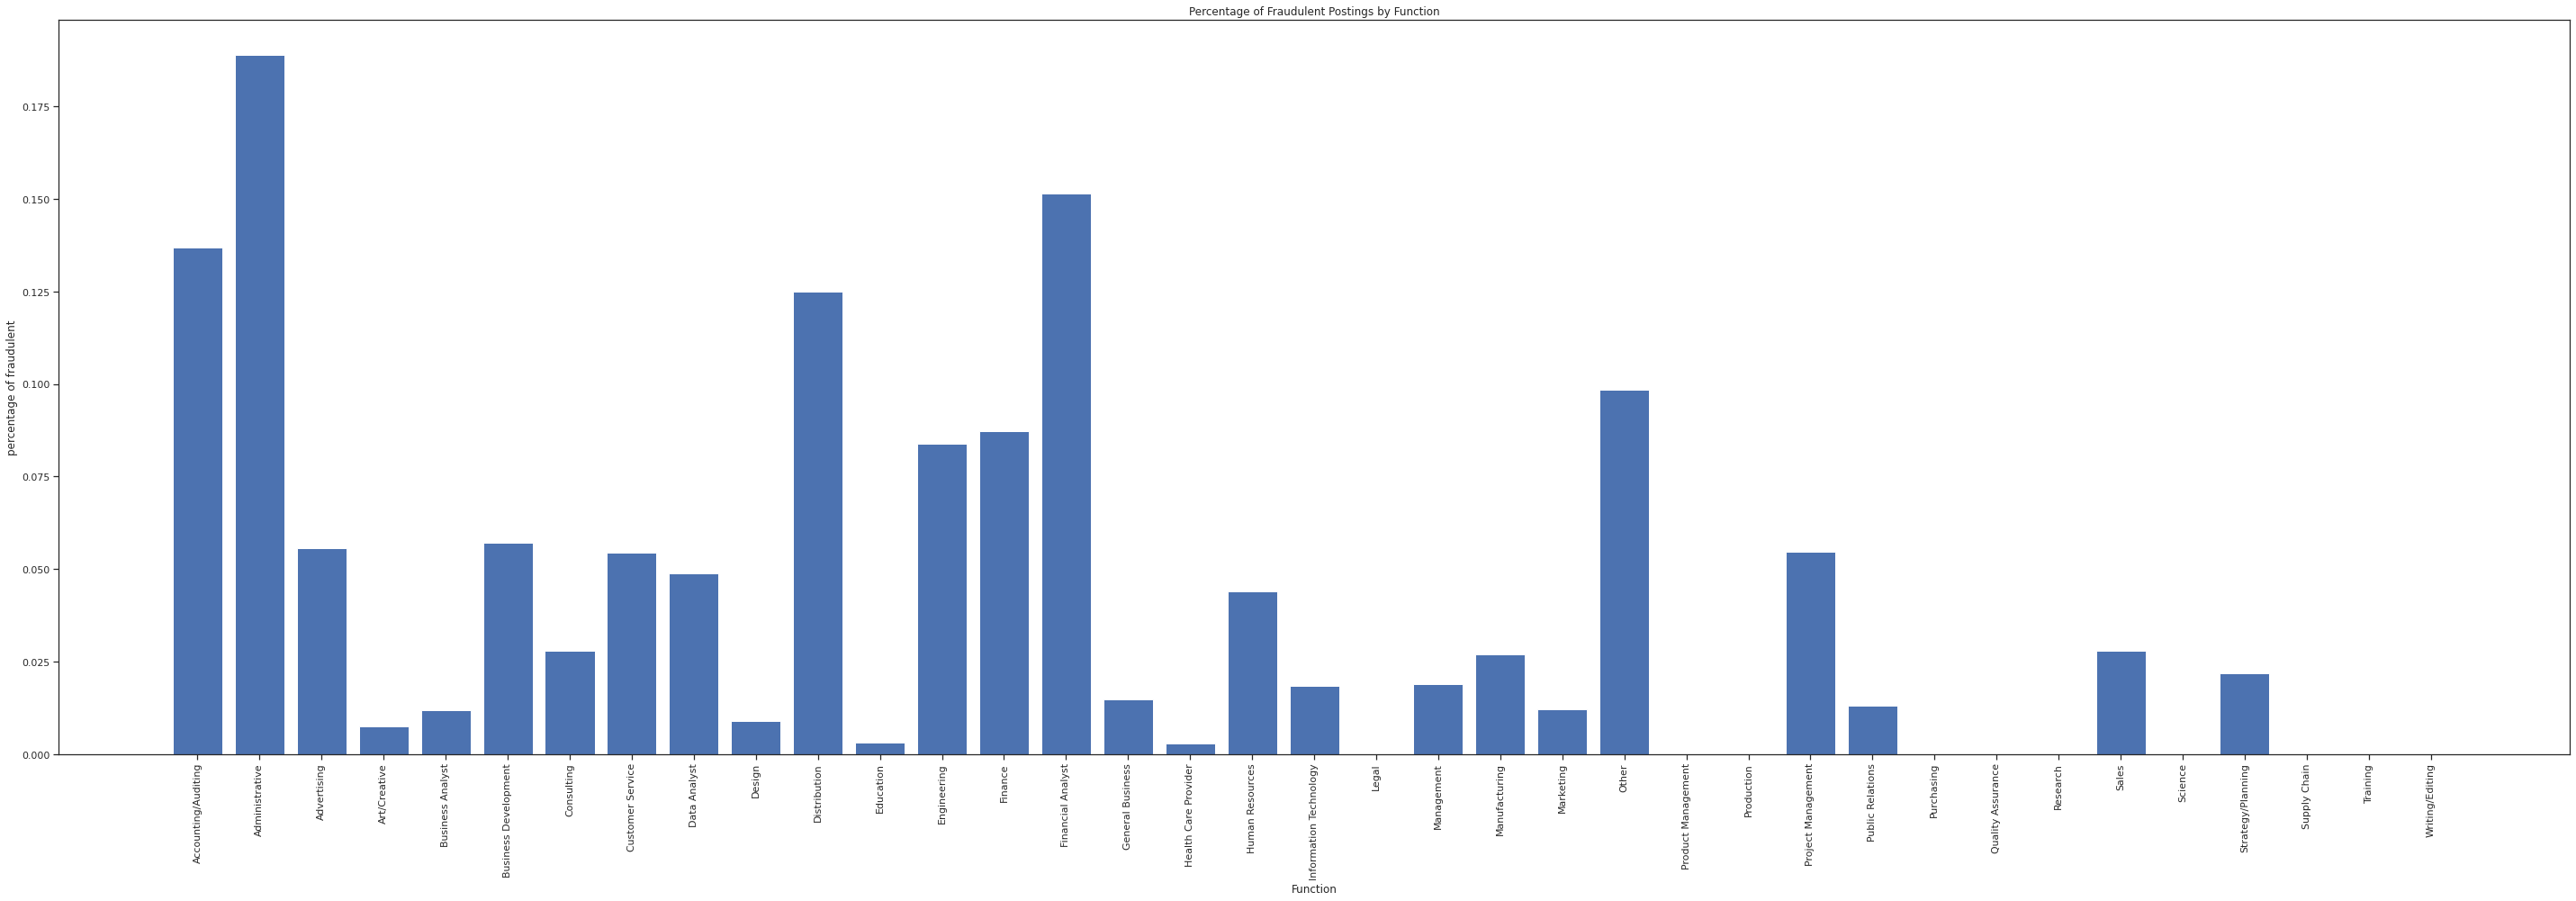

In [ ]:
Fraud_Function=Boolean_Categorical_Fraud.groupby('function').mean()['fraudulent']
plt.figure(figsize=(50,15))
plt.title('Percentage of Fraudulent Postings by Function')
plt.xlabel('Function')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(Fraud_Function.index,dtype='str'),Fraud_Function)
plt.xticks(rotation=90)
plt.show()

The administrative and finance analyst functions are the 2 highest functions with the occurence of fraud

## Textual Analysis

In [ ]:
#Creating a new dataframe with all the text combined into one column and the fraudulent column
textdata = pd.DataFrame()
textdata['text'] = Originaldata['title']+' '+Originaldata['company_profile']+' '+Originaldata['description']+' '+Originaldata['requirements']
textdata = textdata.join(Originaldata['fraudulent']) 

#Removing NaN values
textdata.fillna(' ', inplace=True)


#Seperating the actual and fraudulent job postings 
fraudulent_text = textdata[textdata.fraudulent==0].text
actual_text = textdata[textdata.fraudulent==1].text



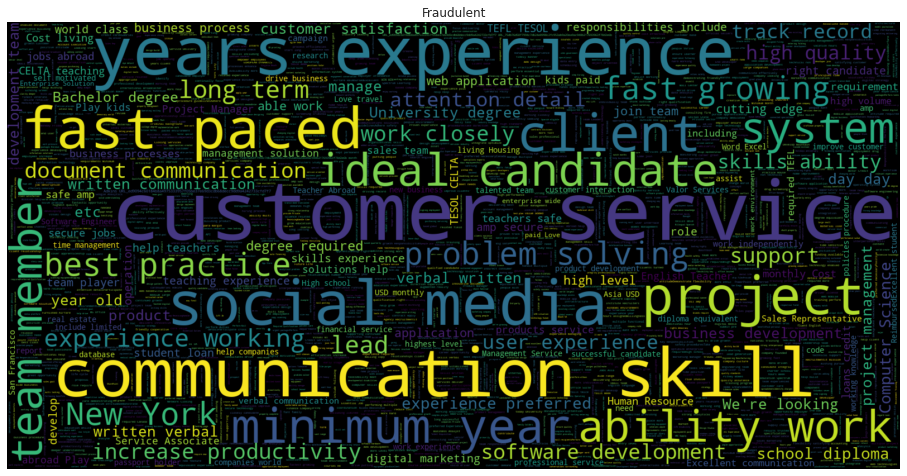

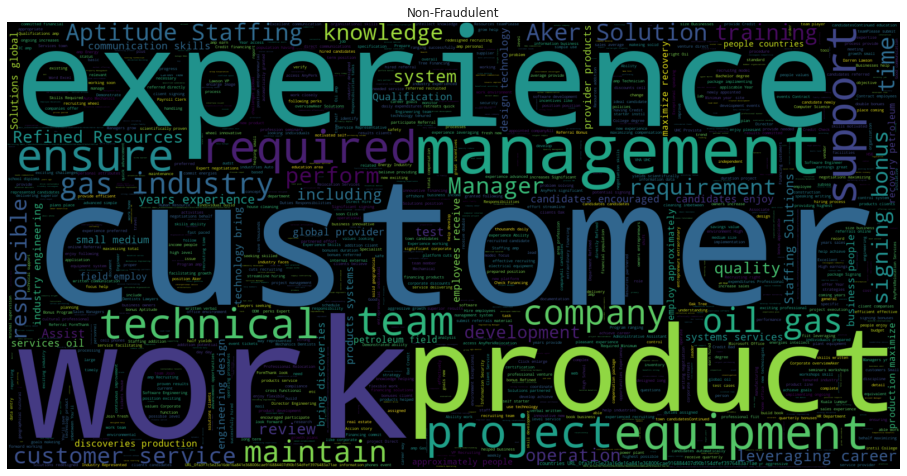

In [ ]:
#Generating Word cloud for fraudulent text
Stopwords = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
word_cloud = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = Stopwords).generate(str(" ".join(fraudulent_text)))
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis("off")
plt.title('Fraudulent')
plt.show()

#Generating Word cloud for actual text
Stopwords = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
word_cloud = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = Stopwords).generate(str(" ".join(actual_text)))
plt.imshow(word_cloud,interpolation = 'bilinear') 
plt.axis("off")
plt.title('Non-Fraudulent')
plt.show()

**Observations from the Word Clouds:**

1. "work", "customer" and "experience" are the words that stand out in non-fraudulent job postings 
2. "customer service", "communication skills", "years experience" and "social media" are most frequent in fraudulent job postings.
3. There are clear differences between the usage of words for fraudulent and non-fraudulent jobs, making text an important factor for classification. 

Now we will move on to the two models. (elaborate)

## Cleaning for Categorical Model



In [ ]:
data_clean = Originaldata.copy()
#checking missing values
data_clean.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                  346
dtype: int64

In [ ]:
data_clean.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent country  
0           0      US  
1           0      NZ  
2           0      US  
3           0      US  
4           0      US

There are noticeably a lot of missing values but we will address this later 

In [ ]:
#creating a new dataset with only the categorical variables we identified  from the primary analysis

data_clean.info()
#new dataset w categorical variables 
data_categorical = pd.DataFrame(data_clean[['country','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function']])
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:

data_categorical.head()

country  telecommuting  has_company_logo  has_questions employment_type  \
0      US              0                 1              0           Other   
1      NZ              0                 1              0       Full-time   
2      US              0                 1              0             NaN   
3      US              0                 1              0       Full-time   
4      US              0                 1              1       Full-time   

  required_experience required_education                   industry  \
0          Internship                NaN                        NaN   
1      Not Applicable                NaN  Marketing and Advertising   
2                 NaN                NaN                        NaN   
3    Mid-Senior level  Bachelor's Degree          Computer Software   
4    Mid-Senior level  Bachelor's Degree     Hospital & Health Care   

               function  
0             Marketing  
1      Customer Service  
2                   NaN  
3                 Sales  
4  Health Care Provider

In [ ]:
#Fill NaN values with blank space
data_categorical.fillna(' ', inplace=True)

In [ ]:
#convert obj to categorical
list_str_obj_cols = data_categorical.columns[data_categorical.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    data_categorical[str_obj_col] = data_categorical[str_obj_col].astype("category")

#convert int64 to categorical
list_str_obj_cols = data_categorical.columns[data_categorical.dtypes == "int64"].tolist()
for str_obj_col in list_str_obj_cols:
    data_categorical[str_obj_col] = data_categorical[str_obj_col].astype("category")

In [ ]:
#Before filling Nan values
#data_categorical.describe() 

In [ ]:
#After filling Nan values
data_categorical.describe() 

country  telecommuting  has_company_logo  has_questions  \
count    17880          17880             17880          17880   
unique      91              2                 2              2   
top         US              0                 1              0   
freq     10656          17113             14220           9088   

       employment_type required_experience required_education industry  \
count            17880               17880              17880    17880   
unique               6                   8                 14      132   
top          Full-time                                                   
freq             11620                7050               8105     4903   

       function  
count     17880  
unique       38  
top              
freq       6455

## Random Forest and Feature Extraction to classify the categorical data

Next, using get_dummies on pandas, we were able to manipulate and convert our categorical data into dummy variables based on the number of categories each variable had and we ended up with 295 dummy categories

In [ ]:
X = pd.get_dummies(data_categorical, prefix_sep = '_')
X.head()

country_   country_AE  country_AL  country_AM  country_AR  country_AT  \
0          0           0           0           0           0           0   
1          0           0           0           0           0           0   
2          0           0           0           0           0           0   
3          0           0           0           0           0           0   
4          0           0           0           0           0           0   

   country_AU  country_BD  country_BE  country_BG  ...  \
0           0           0           0           0  ...   
1           0           0           0           0  ...   
2           0           0           0           0  ...   
3           0           0           0           0  ...   
4           0           0           0           0  ...   

   function_Public Relations  function_Purchasing  function_Quality Assurance  \
0                          0                    0                           0   
1                          0                    0                           0   
2                          0                    0                           0   
3                          0                    0                           0   
4                          0                    0                           0   

   function_Research  function_Sales  function_Science  \
0                  0               0                 0   
1                  0               0                 0   
2                  0               0                 0   
3                  0               1                 0   
4                  0               0                 0   

   function_Strategy/Planning  function_Supply Chain  function_Training  \
0                           0                      0                  0   
1                           0                      0                  0   
2                           0                      0                  0   
3                           0                      0                  0   
4                           0                      0                  0   

   function_Writing/Editing  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 295 columns]

We then planned to use a random forest classifier which grows multiple decision trees which are merged together for a more accurate prediction. The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone especially when there is low (or no) correlation between the individual decision trees which in our case are formed using our categorical data that are broken down into dummy categories. The predictions are either fraudulent or non-fraudulent and the random forest classifiers eventually takes the average of these predictions to make its prediction. 

Dividing the data into categorical data (X) and fraudulent (Y) 

In [ ]:
X = StandardScaler().fit_transform(X)
Y = Originaldata['fraudulent']
Y = LabelEncoder().fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

    mat_con = confusion_matrix(predictionforest,Y_Test)
    # Setting the attributes
    fig, px = plt.subplots(figsize=(7.5, 7.5))
    px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
    for m in range(mat_con.shape[0]):
      for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

    # Sets the labels
    plt.xlabel('Predictions', fontsize=16)
    plt.ylabel('Actuals', fontsize=16)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()

14.710946594000006
[[5088   23]
 [ 139  114]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5111
           1       0.83      0.45      0.58       253

    accuracy                           0.97      5364
   macro avg       0.90      0.72      0.78      5364
weighted avg       0.97      0.97      0.97      5364



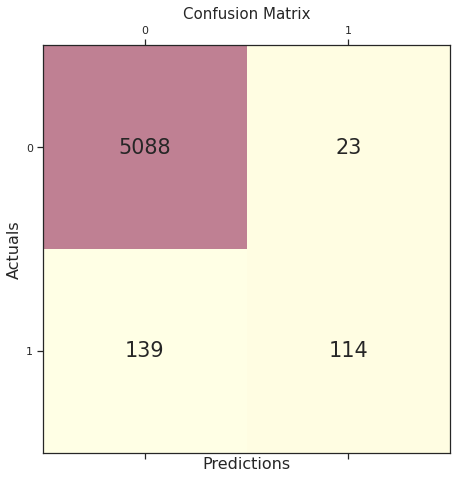

In [ ]:
forest_test(X, Y)

In [ ]:
#splitting the dataframe into 2 halves AND comparing
#first half 
data_categorical_firsthalf = data_categorical.drop(data_categorical.index[8940:17880])
data_categorical_firsthalf
X2 = pd.get_dummies(data_categorical_firsthalf, prefix_sep = '_')
X2





country_   country_AE  country_AL  country_AM  country_AR  country_AT  \
0             0           0           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   
...         ...         ...         ...         ...         ...         ...   
8935          0           0           0           0           0           0   
8936          0           0           0           0           0           0   
8937          0           0           0           0           0           0   
8938          0           0           0           0           0           0   
8939          0           0           0           0           0           0   

      country_AU  country_BD  country_BE  country_BG  ...  \
0              0           0           0           0  ...   
1              0           0           0           0  ...   
2              0           0           0           0  ...   
3              0           0           0           0  ...   
4              0           0           0           0  ...   
...          ...         ...         ...         ...  ...   
8935           0           0           0           0  ...   
8936           0           0           0           0  ...   
8937           0           0           0           0  ...   
8938           0           0           0           0  ...   
8939           0           0           0           0  ...   

      function_Public Relations  function_Purchasing  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   
...                         ...                  ...   
8935                          0                    0   
8936                          0                    0   
8937                          0                    0   
8938                          0                    0   
8939                          0                    0   

      function_Quality Assurance  function_Research  function_Sales  \
0                              0                  0               0   
1                              0                  0               0   
2                              0                  0               0   
3                              0                  0               1   
4                              0                  0               0   
...                          ...                ...             ...   
8935                           0                  0               0   
8936                           0                  0               0   
8937                           0                  0               0   
8938                           0                  0               0   
8939                           0                  0               0   

      function_Science  function_Strategy/Planning  function_Supply Chain  \
0                    0                           0                      0   
1                    0                           0                      0   
2                    0                           0                      0   
3                    0                           0                      0   
4                    0                           0                      0   
...                ...                         ...                    ...   
8935                 0                           0                      0   
8936                 0                           0                      0   
8937                 0                           0                      0   
8938                 0      

In [ ]:
X2 = StandardScaler().fit_transform(X2)

In [ ]:
#2nd half of the data
data_categorical_secondhalf = data_categorical.drop(data_categorical.index[0:8940])
data_categorical_secondhalf
X3 = pd.get_dummies(data_categorical_secondhalf, prefix_sep = '_')
X3

country_   country_AE  country_AL  country_AM  country_AR  country_AT  \
8940           0           0           0           0           0           0   
8941           0           0           0           0           0           0   
8942           0           0           0           0           0           0   
8943           0           0           0           0           0           0   
8944           0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
17875          0           0           0           0           0           0   
17876          0           0           0           0           0           0   
17877          0           0           0           0           0           0   
17878          0           0           0           0           0           0   
17879          0           0           0           0           0           0   

       country_AU  country_BD  country_BE  country_BG  ...  \
8940            0           0           0           0  ...   
8941            0           0           0           0  ...   
8942            0           0           0           0  ...   
8943            0           0           0           0  ...   
8944            0           0           0           0  ...   
...           ...         ...         ...         ...  ...   
17875           0           0           0           0  ...   
17876           0           0           0           0  ...   
17877           0           0           0           0  ...   
17878           0           0           0           0  ...   
17879           0           0           0           0  ...   

       function_Public Relations  function_Purchasing  \
8940                           0                    0   
8941                           0                    0   
8942                           0                    0   
8943                           0                    0   
8944                           0                    0   
...                          ...                  ...   
17875                          0                    0   
17876                          0                    0   
17877                          0                    0   
17878                          0                    0   
17879                          0                    0   

       function_Quality Assurance  function_Research  function_Sales  \
8940                            0                  0               0   
8941                            0                  0               0   
8942                            0                  0               0   
8943                            0                  0               0   
8944                            0                  0               1   
...                           ...                ...             ...   
17875                           0                  0               1   
17876                           0                  0               0   
17877                           0                  0               0   
17878                           0                  0               0   
17879                           0                  0               0   

       function_Science  function_Strategy/Planning  function_Supply Chain  \
8940                  0                           0                      0   
8941                  0                           0                      0   
8942                  0                           0                      0   
8943                  0                           0                      0   
8944                  0                           0                      0   
...                 ...                         ...                    ...   
17875                 0                           0                      0   
17876                 0                           0                      0   
17877                 0                          

In [ ]:
X3 = StandardScaler().fit_transform(X3)

In [ ]:
Y2 = pd.DataFrame(Originaldata[['fraudulent']])
Y2 = Originaldata['fraudulent'].drop(Originaldata['fraudulent'].index[8940:17880])
Y2 = LabelEncoder().fit_transform(Y2)
Y2



array([0, 0, 0, ..., 0, 0, 0])

5.787218019999955
[[2551   12]
 [  56   63]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2563
           1       0.84      0.53      0.65       119

    accuracy                           0.97      2682
   macro avg       0.91      0.76      0.82      2682
weighted avg       0.97      0.97      0.97      2682



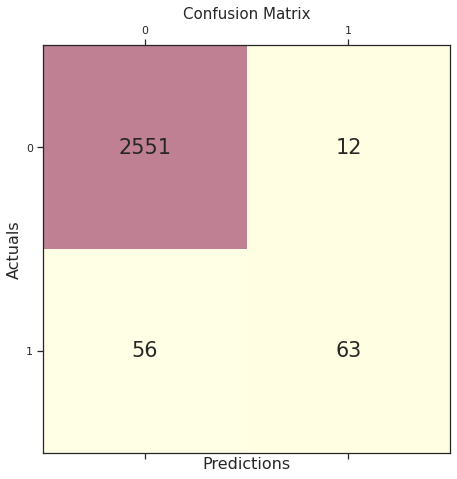

In [ ]:
forest_test(X2, Y2) #first half of the dataset

In [ ]:
Y3 = pd.DataFrame(Originaldata[['fraudulent']])
Y3 = Originaldata['fraudulent'].drop(Originaldata['fraudulent'].index[0:8940])
Y3 = LabelEncoder().fit_transform(Y3)
Y3

array([0, 0, 0, ..., 0, 0, 0])

5.737025365000022
[[2538   10]
 [  67   67]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2548
           1       0.87      0.50      0.64       134

    accuracy                           0.97      2682
   macro avg       0.92      0.75      0.81      2682
weighted avg       0.97      0.97      0.97      2682



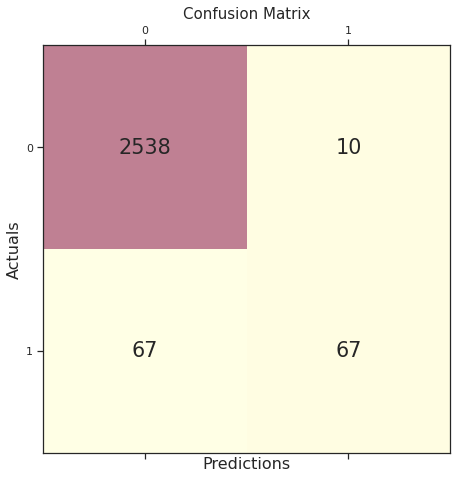

In [ ]:
forest_test(X3, Y3) #second half of the dataset

After training the random forest classifier using all the features, we tested it against the entire data set, the first half of the data set as well as the second half of the data set. The classifier proved to be consistent throughout, attaining a classification accuracy of 97-98%

## Principal Component Analysis 

Next, we adopted feature extraction using Principal Component Analysis which  
is a linear dimensionality reduction technique. It takes our original data and tries to find a combination of the input features which can best summarize the original data distribution so that its reduces its original dimensions. Eventually we are able to reduce our original data to just two variables


In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, Originaldata['fraudulent']], axis = 1)
PCA_df['fraudulent'] = LabelEncoder().fit_transform(PCA_df['fraudulent'])
PCA_df.head()

PC1       PC2  fraudulent
0  0.985121 -0.042270           0
1 -0.934524  1.140733           0
2  3.757480  0.279755           0
3 -2.112236  0.009659           0
4 -2.225415 -0.293644           0

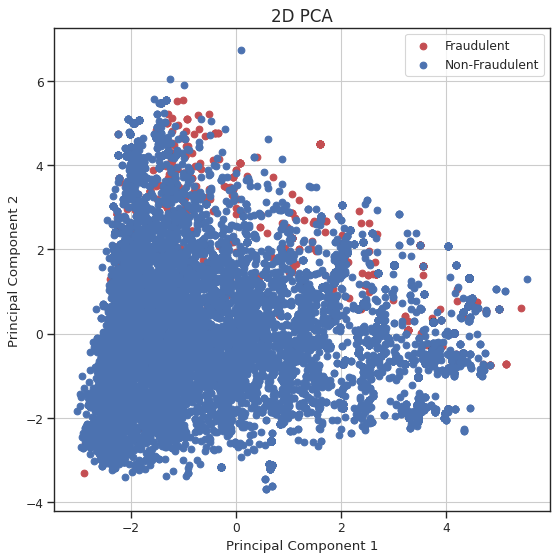

In [ ]:
  
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['fraudulent'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['fraudulent'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Fraudulent', 'Non-Fraudulent'])
plt.grid()

We observed that there was noticeable overlapping of fraudulent and non-fraudulent jobs when we created a 2D scatterplot of the PCA data set’s distribution. This can be due to a few reasons: 
The first being that the big contrast between the large number of actual non-fraudulent data sets and fraudulent data sets make it such that the model is not trained to be as efficient as it can be.
The second being that a fraudulent categorical data can quite easily mirror a non-fraudulent categorical data, for instance “marketing” or “sales”


8.629082434999987
[[5069   42]
 [ 152  101]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5111
           1       0.71      0.40      0.51       253

    accuracy                           0.96      5364
   macro avg       0.84      0.70      0.75      5364
weighted avg       0.96      0.96      0.96      5364



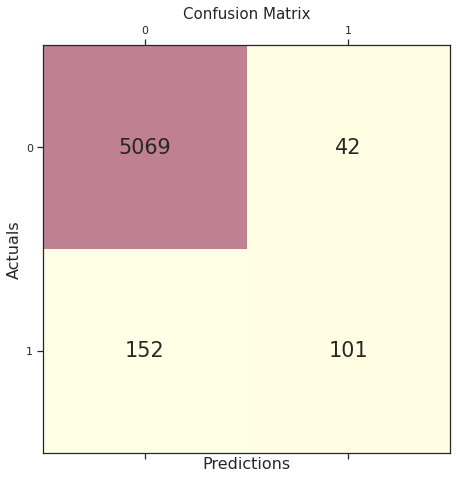

In [ ]:
forest_test(X_pca, Y)

[5.03111083 2.97361767 2.80405893]
8.3043865919999
[[5084   27]
 [ 153  100]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5111
           1       0.79      0.40      0.53       253

    accuracy                           0.97      5364
   macro avg       0.88      0.69      0.75      5364
weighted avg       0.96      0.97      0.96      5364



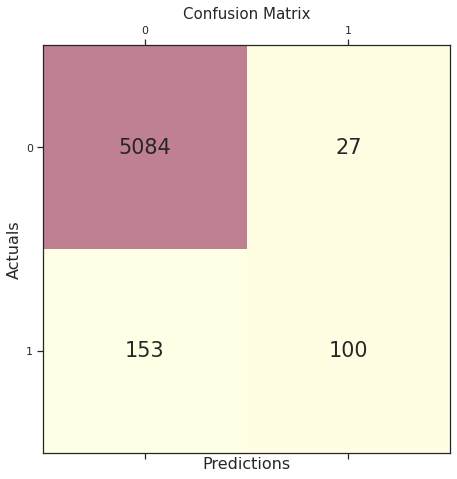

In [ ]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

After running random forest on the data set created using PCA, we concluded that the addition of more features the model is better at predicting fraudulent jobs. When we ran the Random Forest Classifier using the dataset containing the 2 features constructed by PCA we achieved a 96% classification accuracy and upon using a dataset that we constructed adding another feature, we achieved a 97% classification accuracy



# **Cleaning and Preprocessing for Textual Classification**
Using Natural Language Processing

Converting the text to lowercase

In [ ]:
textdata['text']=textdata['text'].str.lower()
textdata.head()

text  fraudulent
0  marketing intern we're food52, and we've creat...           0
1  customer service - cloud video production 90 s...           0
2  commissioning machinery assistant (cma) valor ...           0
3  account executive - washington dc our passion ...           0
4  bill review manager spotsource solutions llc i...           0

Lemmatization

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
 
nrows = len(textdata)
lemmatized_list = [] 

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized = []
    
    # Save the text and its words into an object
    text = textdata.loc[row]['text']
    tokens = nltk.word_tokenize(text)

    for word in tokens:
      lemmatized.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatizedText = " ".join(lemmatized)
    
    # Append to the list containing the texts
    lemmatized_list.append(lemmatizedText)

textdata['lematized'] = lemmatized_list 
textdata.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


text  fraudulent  \
0  marketing intern we're food52, and we've creat...           0   
1  customer service - cloud video production 90 s...           0   
2  commissioning machinery assistant (cma) valor ...           0   
3  account executive - washington dc our passion ...           0   
4  bill review manager spotsource solutions llc i...           0   

                                           lematized  
0  market intern we 're food52 , and we 've creat...  
1  customer service - cloud video production 90 s...  
2  commission machinery assistant ( cma ) valor s...  
3  account executive - washington dc our passion ...  
4  bill review manager spotsource solutions llc b...

Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
stop_words.remove('no')
stop_words.remove('not')

textdata['without_stopwords'] = textdata['lematized']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    textdata['without_stopwords'] = textdata['without_stopwords'].str.replace(regex_stopword, '')
textdata.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

The default value of regex will change from True to False in a future version.



text  fraudulent  \
0  marketing intern we're food52, and we've creat...           0   
1  customer service - cloud video production 90 s...           0   
2  commissioning machinery assistant (cma) valor ...           0   
3  account executive - washington dc our passion ...           0   
4  bill review manager spotsource solutions llc i...           0   

                                           lematized  \
0  market intern we 're food52 , and we 've creat...   
1  customer service - cloud video production 90 s...   
2  commission machinery assistant ( cma ) valor s...   
3  account executive - washington dc our passion ...   
4  bill review manager spotsource solutions llc b...   

                                   without_stopwords  
0  market intern  ' food52 ,   ' create  groundbr...  
1  customer service - cloud video production 90 s...  
2  commission machinery assistant ( cma ) valor s...  
3  account executive - washington dc  passion  im...  
4  bill review manager spotsource solutions llc  ...

# **Building the Classification Model**

In [ ]:
final_text = pd.DataFrame()
final_text['text'] = textdata['without_stopwords']
final_text = final_text.join(Originaldata['fraudulent']) 

final_text.head()

text  fraudulent
0  market intern  ' food52 ,   ' create  groundbr...           0
1  customer service - cloud video production 90 s...           0
2  commission machinery assistant ( cma ) valor s...           0
3  account executive - washington dc  passion  im...           0
4  bill review manager spotsource solutions llc  ...           0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_text['text'], 
                                                    final_text['fraudulent'], 
                                                    test_size=0.30)

In [ ]:
print('rows in test set: ' + str(X_test.shape))
print('rows in train set: ' + str(X_train.shape))

rows in test set: (5364,)
rows in train set: (12516,)


In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
print("classifier accuracy {:.2f}%".format(classifier.score(X_test, y_test) * 100))

classifier accuracy 96.36%


In [ ]:
predicted = classifier.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test.tolist()
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )



Confusion Matrix :
[[5099    0]
 [ 195   70]]
Accuracy Score : 0.9636465324384788
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5099
           1       1.00      0.26      0.42       265

    accuracy                           0.96      5364
   macro avg       0.98      0.63      0.70      5364
weighted avg       0.96      0.96      0.95      5364



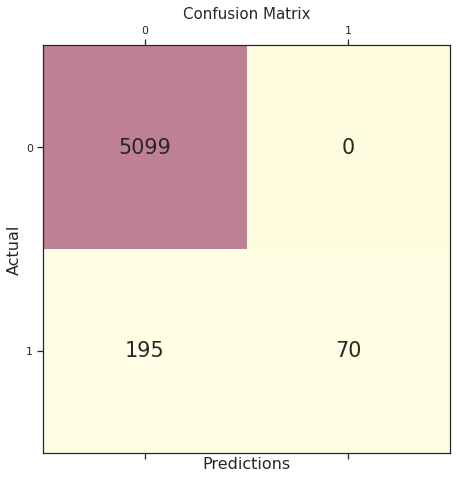

In [ ]:
mat_con1 = confusion_matrix(predicted,actual)
# Setting the attributes
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con1, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con1.shape[0]):
  for n in range(mat_con1.shape[1]):
    px.text(x=m,y=n,s=mat_con1[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

**Analysis**

As seen in the confusion matrix, all of the non-fraudulent data was predicted as non-fraudulent. There are also 0 false positives. However, there are quite a few false negatives which are concerning as for this problem, it is better to classify a non-fraudulent job as fraudulent than classifying a fraudulent job as non-fraudulent. 


# **Conclusion**


When we put the two models side by side, the support vector machine model excels in the way that it did not generate any false positive results while the random forest model was able to generate fewer false negative results. Both models were able to attain high classification accuracy of 96 and 97 percent respectively. However both models display low to moderate levels of recall value for “fraudulent” which is the ability of the classifier to find the fraudulent jobs. This could be due to the significantly low fraudulent jobs compared to non-fraudulent job openings which i previously mentioned and hence the classifiers cannot be trained optimally. A possible solution would be to combined both the random forest classifier together with the support vector classifier to patch up these flaws. If we had to give one model the edge, it would probably be the support vector machine classifier because it did not wrongly classify non-fraudulent jobs as fraudulent jobs which is what we were trying to achieve at the start of this project. Furthermore, text data is more organic and original and thus might serve as a clearer indicator of fraudulent and non-fraudulent jobs


Lastly, our takeaways from this project is that we were able 
to apply many things outside of this course. We applied the natural language processing pipeline, utilised pandas profiling for our exploratory data analysis. We also did our own research on vectorisation, the support vector classifier, random forest classifier, principal component analysis to form our classifiers. 
